# LIWC Test
*(Always to be run as sets up important env)*

In [1]:
# Set the Reddit Data File Path (JSON)
data_file_path = "data/texas_comments.json"

time_interval_seconds = 2 * 30 * 24 * 60 * 60 # two months
time_start = 1546300801 # 1st January 2019
time_end = 1672531201 # 1st January 2023

activity_bucket_limits = [1, 10, 100, 1000, 10000, 100000, 1000000] # Inclusive on lower bound, exclusive on upper bound - strictly integers

In [2]:
!sed -i -e '/[<(]/d' dictionaries/LIWC07-EN.dic

In [3]:
import liwc
parse, category_names = liwc.load_token_parser('dictionaries/LIWC07-EN.dic')

In [4]:
import re
from collections import Counter

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

def count_categories(text):
    # Returns a Counter object containing tallies of all LIWC categories
    text = text.lower()

    # Remove all words in text that are less than 3 characters long
    text = re.sub(r'\b\w{1,3}\b', '', text)

    # Remove "[removed]" and "[deleted]" from the body text
    text = re.sub(r'\[removed\]|\[deleted\]', '', text)
    
    tokens = tokenize(text)
    counter = Counter(category for token in tokens for category in parse(token))

    # If a category doesn't exist in the text, we need to add it and set the count to 0
    for category in category_names:
        if category not in counter:
            counter[category] = 0



    return counter

gettysburg = "hello world, this [removed]"

print(count_categories(gettysburg))

Counter({'social': 1, 'relativ': 1, 'space': 1, 'funct': 1, 'pronoun': 1, 'ipron': 1, 'ppron': 0, 'i': 0, 'we': 0, 'you': 0, 'shehe': 0, 'they': 0, 'article': 0, 'verb': 0, 'auxverb': 0, 'past': 0, 'present': 0, 'future': 0, 'adverb': 0, 'preps': 0, 'conj': 0, 'negate': 0, 'quant': 0, 'number': 0, 'swear': 0, 'family': 0, 'friend': 0, 'humans': 0, 'affect': 0, 'posemo': 0, 'negemo': 0, 'anx': 0, 'anger': 0, 'sad': 0, 'cogmech': 0, 'insight': 0, 'cause': 0, 'discrep': 0, 'tentat': 0, 'certain': 0, 'inhib': 0, 'incl': 0, 'excl': 0, 'percept': 0, 'see': 0, 'hear': 0, 'feel': 0, 'bio': 0, 'body': 0, 'health': 0, 'sexual': 0, 'ingest': 0, 'motion': 0, 'time': 0, 'work': 0, 'achieve': 0, 'leisure': 0, 'home': 0, 'money': 0, 'relig': 0, 'death': 0, 'assent': 0, 'nonfl': 0, 'filler': 0})


## Determine User Buckets

In [5]:
import tqdm
import pandas as pd
import json
import os


# Group the users into buckets based on activity during each time interval
# Create a list of dictionaries the following format: (the index in the list is the time bucket index)
# [{user_id: posts_during_time_interval, user_id: posts_during_time_interval, ...}, 
#  {user_id: posts_during_time_interval, user_id: posts_during_time_interval, ...}, ...]

# Initialise a list of empty dictionaries of the amount of time intervals
activity_buckets = [{} for i in range(int((time_end - time_start) / time_interval_seconds) + 1)]

# Initialise progress bar
pbar = tqdm.tqdm(total=os.path.getsize(data_file_path))

# Iterate through the data file
with open(data_file_path) as data_file:
    # Analyse each line in the data file
    for line in data_file:
        # Load the line as a JSON object
        line_json = json.loads(line)
        
        # Get the timestamp of the comment
        timestamp = int(line_json["created_utc"])
        user_id = line_json["author"]

        # Check if within start and end time
        if timestamp < time_start or timestamp > time_end:
            # Update the progress bar
            pbar.update(len(line))
            continue
        
        # Get the time interval index
        time_interval_index = int((timestamp - time_start) / time_interval_seconds)

        # Check if the user has already been added to the activity bucket
        if user_id in activity_buckets[time_interval_index]:
            # Increment the user's post count
            activity_buckets[time_interval_index][user_id] += 1
        else:
            # Add the user to the activity bucket
            activity_buckets[time_interval_index][user_id] = 1

        # Update the progress bar
        pbar.update(len(line))

# Close the progress bar
pbar.close()

# Initialise another progress bar
pbar = tqdm.tqdm(total=len(activity_buckets))

# Change the activity count into bucket indices
for time_bucket in activity_buckets:
    # Update the progress bar
    pbar.update(1)
    for user in time_bucket:
        # Iterate through the activity bucket limits
        for i in range(len(activity_bucket_limits)):
            # Using the activity bucket limits, find the bucket index
            if time_bucket[user] >= activity_bucket_limits[i] and time_bucket[user] < activity_bucket_limits[i + 1]:
                # Set the activity bucket to the bucket index
                time_bucket[user] = i
                break


# Close the progress bar
pbar.close()

activity_buckets

100%|██████████| 25/25 [00:00<00:00, 51.92it/s] 


[{'krissime': 0,
  'Texan_Greyback': 1,
  'loficiti': 0,
  'sophiabrat': 0,
  'o_g': 0,
  'shadowspawn': 1,
  'BabyT-RexArms': 0,
  'QcumberKid': 0,
  'trailorparkprincess': 0,
  'EssArrBee': 0,
  'Cool_Ranch_Dodrio': 2,
  'BiscuitHead3000': 0,
  'M6D_Magnum': 1,
  'Tannerbkelly': 0,
  'AGreenSmudge': 1,
  'Anthonyzzzzz': 0,
  'sisimartini28': 0,
  'winethief': 0,
  'MEGAYACHT': 0,
  'bgadds': 0,
  'ThickPrick': 0,
  'CorinthWest': 1,
  'Chemspiration': 0,
  'Kemah': 0,
  'Aggieann': 0,
  'iLLBrasky82': 0,
  'preshred': 0,
  'HydRO-7': 0,
  'FortressMost': 0,
  'Slummish': 1,
  'HagalinaMagalina': 0,
  'flagautism': 1,
  'HHO980': 0,
  'Steak_Knight': 1,
  'quiltsohard': 1,
  'tacol00t': 0,
  'alltheprettysongs': 0,
  'I_am_who': 0,
  '[deleted]': 3,
  'PerilousAll': 1,
  'Geaux_joel': 0,
  'MarcProust': 1,
  'SeaTurtleAss': 0,
  'leighroda82': 0,
  'Hufflypuffly723': 0,
  'ripster65': 1,
  'ZRodri8': 2,
  'ChilrenOfAnEldridGod': 1,
  'mrtie007': 0,
  'noodlespork': 0,
  'earthwirmjim'

## Create CSV

In [6]:
run_CSV_creation = True

if run_CSV_creation:
    # Intialise the progress bar based on the number of items in the data file
    with open(data_file_path) as f:
        num_lines = sum(1 for line in f)

    pbar = tqdm.tqdm(total=num_lines)

    # Read the data file and add the data to the csv file
    with open(data_file_path) as f:
        with open(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC.csv', 'w') as csv_file:

            # Clear the csv file of any existing data
            csv_file.truncate(0)

            for line in f:
                LIWC_by_bucket = json.loads(line)
                utc_timestamp = LIWC_by_bucket['created_utc']
                body_text = LIWC_by_bucket['body']
                LIWC_categories = count_categories(body_text)
                author = LIWC_by_bucket['author']

                # Check if post is within the time interval
                if int(utc_timestamp) < time_start or int(utc_timestamp) > time_end:
                    pbar.update(1)
                    continue

                # Determine the activity bucket index
                time_interval_index = int((int(utc_timestamp) - time_start) / time_interval_seconds)
                activity_buckets_index = activity_buckets[time_interval_index][author]

                # Cleanse the body_text of any newlines, commas, and quotation marks, and replace them with spaces
                body_text = body_text.replace('\n', ' ').replace(',', ' ').replace('"', ' ')


                # Write the data to the csv file
                csv_file.write(f'{utc_timestamp},"{LIWC_categories}", {activity_buckets_index}, "{body_text}"\n')

                # Update the progress bar
                pbar.update(1)
            

    # Close the progress bar
    pbar.close()


100%|██████████| 2684972/2684972 [11:55<00:00, 3750.55it/s]


In [7]:
# Load the data from the csv file into a dataframe
df = pd.read_csv(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC.csv', lineterminator='\n')

# Add headers to the dataframe
df.columns = ['utc_timestamp', 'LIWC_categories', 'activity_bucket_index', 'body_text']

df.head()

,utc_timestamp,LIWC_categories,activity_bucket_index,body_text
0,1546300972,"Counter({'funct': 3, 'pronoun': 2, 'ipron': 2,...",1,"""Ok I'm sorry but what does that mean?"""
1,1546300987,"Counter({'funct': 1, 'adverb': 1, 'cogmech': 1...",0,"""Just swap the vanilla for pistachio and the ..."
2,1546301166,"Counter({'percept': 3, 'verb': 2, 'past': 2, '...",0,"""It looked like a watercolor painting didn’t ..."
3,1546301171,"Counter({'space': 1, 'relativ': 1, 'cogmech': ...",0,"""It's Hale Center. And you forgot Plainview ..."
4,1546301292,"Counter({'verb': 1, 'present': 1, 'cogmech': 1...",1,"""Now I want steak fried in oleo. """


In [8]:
import numpy as np

# Calculate time bucket intervals
time_buckets = range(int(time_start), int(time_end) + int(time_interval_seconds), int(time_interval_seconds))

# Print maximum utc_timestamp
# print(df['utc_timestamp'].max())
# print("------------------")
# print(*time_buckets, sep='\n')


# Change the utc_timestamp to the bucket number, e.g. the 0th bucket is between the 0th index and the 1st index of the time_buckets
df['utc_timestamp'] = df['utc_timestamp'].apply(lambda x: np.searchsorted(time_buckets, x) - 1)


df.head()

,utc_timestamp,LIWC_categories,activity_bucket_index,body_text
0,0,"Counter({'funct': 3, 'pronoun': 2, 'ipron': 2,...",1,"""Ok I'm sorry but what does that mean?"""
1,0,"Counter({'funct': 1, 'adverb': 1, 'cogmech': 1...",0,"""Just swap the vanilla for pistachio and the ..."
2,0,"Counter({'percept': 3, 'verb': 2, 'past': 2, '...",0,"""It looked like a watercolor painting didn’t ..."
3,0,"Counter({'space': 1, 'relativ': 1, 'cogmech': ...",0,"""It's Hale Center. And you forgot Plainview ..."
4,0,"Counter({'verb': 1, 'present': 1, 'cogmech': 1...",1,"""Now I want steak fried in oleo. """


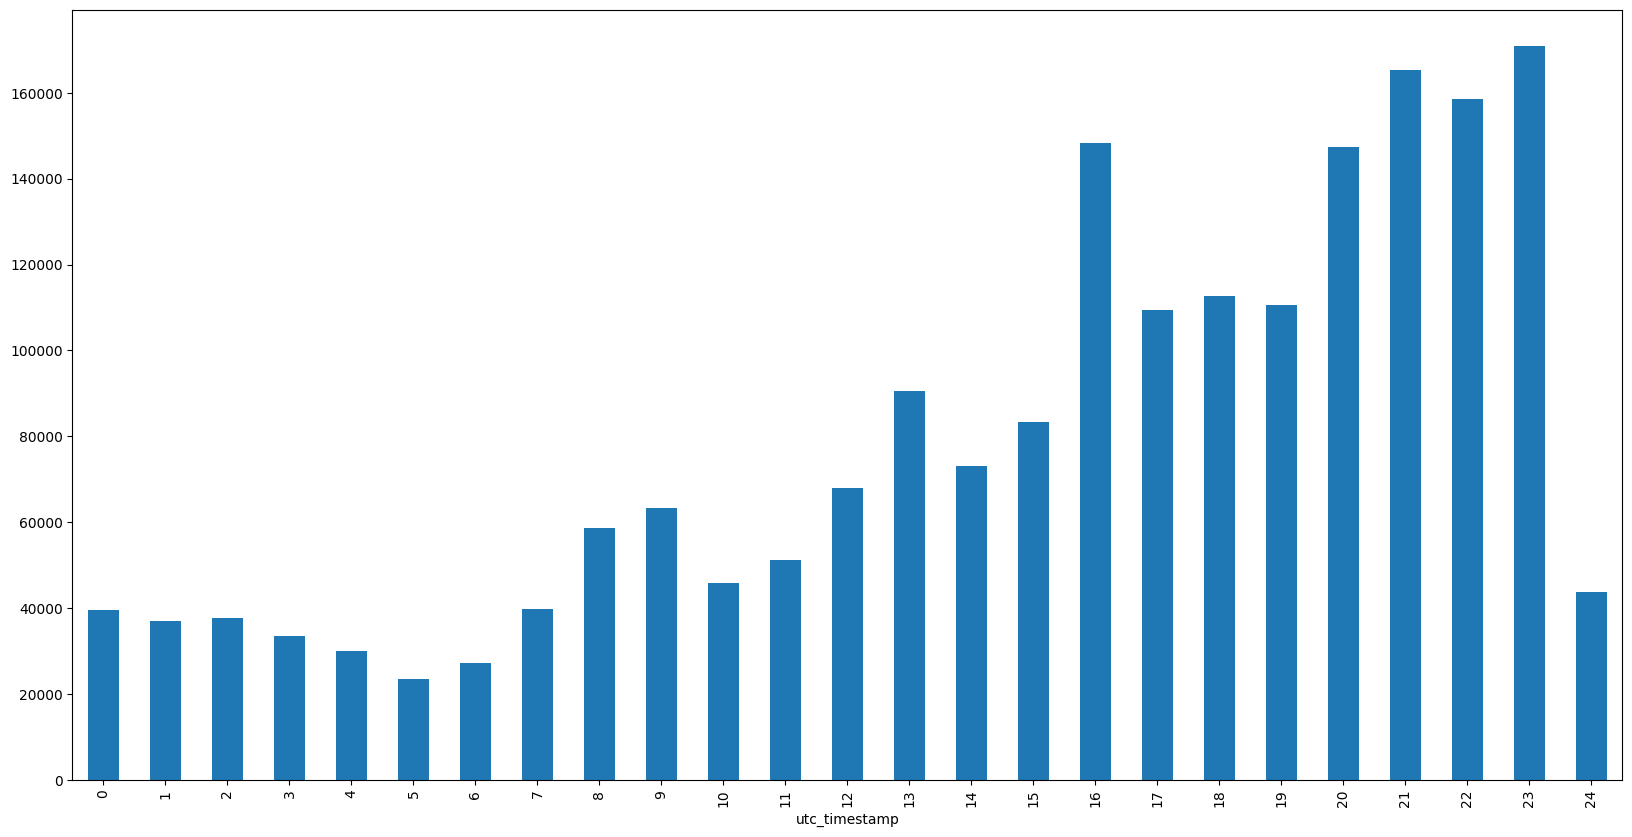

In [9]:
# Graph the number of comments per time bucket
import matplotlib.pyplot as plt

# Delete all rows with a utc_timestamp of -1
df = df[df['utc_timestamp'] != -1]

df['utc_timestamp'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
plt.show()

In [14]:
# Select the LIWC category to graph
category = 'posemo'

# The LIWC categories stored in a list
data = [
    'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
    'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future',
    'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear',
    'social', 'family', 'friend', 'humans', 'affect', 'posemo',
    'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause',
    'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', 'percept',
    'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest',
    'relativ', 'motion', 'space', 'time', 'work', 'achieve', 'leisure',
    'home', 'money', 'relig', 'death', 'assent', 'nonfl', 'filler'
]

# Construct a dictionary with the value in the form of a nested list, and the key as the LIWC category
# where the outer index is the activity_bucket_index, and the inner index is the time_bucket_index
# {LIWC_category: [[time_bucket_0, time_bucket_1, ...], [time_bucket_0, time_bucket_1, ...], ...]}

# Initialise the dictionary
LIWC_category_dict = {}

# Initialise the dictionary with empty nested lists
LIWC_category_dict = {category: [[0 for _ in time_buckets] for _ in activity_bucket_limits] for category in data}

print(LIWC_category_dict)

# Start a progress bar
pbar = tqdm.tqdm(total=len(df))

# Iterate through each entry in df and aggregate the LIWC categories for each time_bucket
for index, row in df.iterrows():
    # Get the time_bucket and LIWC_categories
    time_bucket = row['utc_timestamp']
    LIWC_categories = row['LIWC_categories']
    activity_bucket_index = row['activity_bucket_index']

    # Convert the LIWC_categories string to a dictionary
    LIWC_categories = eval(LIWC_categories)

    # A percentage of all LIWC words must be the selected category
    # Check that LIWC_categories[selected_category] is not zero to avoid division by zero
    if LIWC_categories[category] != 0:
        if not LIWC_categories[category] / sum(LIWC_categories.values()) > 0.05:
            # Update the progress bar
            pbar.update(1)
            continue
            

    # For each row, go through the LIWC categories and add the time_bucket to the correct list
    for category in LIWC_categories:
        LIWC_category_dict[category][activity_bucket_index][time_bucket] += (LIWC_categories[category])

    # Update the progress bar
    pbar.update(1)

# Close the progress bar
pbar.close()

LIWC_category_dict

{'funct': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'pronoun': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

 69%|██████▉   | 1356019/1968638 [14:37<06:45, 1510.71it/s]

In [ ]:
# Normalise the data by dividing each value by the total number of LIWC detected words in that activity and time bucket

# Get the sum of all the LIWC categories for each activity and time bucket in the form of a nested list, the outer index is the activity_bucket_index, and the inner index is the time_bucket_index
# [[time_bucket_0, time_bucket_1, ...], [time_bucket_0, time_bucket_1, ...], ...]

data = [
    'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they',
    'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future',
    'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear',
    'social', 'family', 'friend', 'humans', 'affect', 'posemo',
    'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause',
    'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', 'percept',
    'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest',
    'relativ', 'motion', 'space', 'time', 'work', 'achieve', 'leisure',
    'home', 'money', 'relig', 'death', 'assent', 'nonfl', 'filler'
]

LIWC_category_dict_normalised = LIWC_category_dict

LIWC_category_sums = [[0 for _ in time_buckets] for _ in activity_bucket_limits]

for activity_bucket_index in range(len(activity_bucket_limits)):
    for time_bucket_index in range(len(time_buckets)):
        # Sum the LIWC categories for each activity and time bucket
        LIWC_category_sums[activity_bucket_index][time_bucket_index] = sum(LIWC_category_dict[category][activity_bucket_index][time_bucket_index] for category in data)

print(LIWC_category_sums)

# Normalise the data by dividing each value by the total number of LIWC detected words in that activity and time bucket
for activity_bucket_index in range(len(activity_bucket_limits)):
    for time_bucket_index in range(len(time_buckets)):
        for category in data:
            # Normalise the data
            # If sum is zero, set to zero, otherwise divide
            if LIWC_category_sums[activity_bucket_index][time_bucket_index] == 0:
                LIWC_category_dict_normalised[category][activity_bucket_index][time_bucket_index] = 0
            else:
                LIWC_category_dict_normalised[category][activity_bucket_index][time_bucket_index] /= LIWC_category_sums[activity_bucket_index][time_bucket_index]


# Save LIWC_category_dict_normalised as a literal string to a file
with open(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC_normalised.json', 'w') as f:
    f.write(str(LIWC_category_dict_normalised))

[[463185, 455026, 484147, 409961, 396361, 345366, 349892, 590108, 823168, 908671, 616622, 712157, 1159897, 1374663, 987635, 1227180, 1939462, 1408071, 1426653, 1375631, 1910249, 2293898, 2011979, 2191550, 831602, 0], [483623, 466465, 494523, 397289, 389024, 304076, 340331, 509132, 851307, 944886, 603005, 718231, 924363, 1531930, 1209646, 1381661, 2563029, 1726294, 1778738, 1792097, 2742023, 3052039, 2721086, 3029301, 723649, 0], [329899, 249468, 175968, 276096, 197034, 92082, 170739, 224666, 404274, 410760, 261432, 199568, 140597, 355059, 400209, 277473, 779659, 530287, 436024, 439008, 906864, 940220, 828606, 887674, 59932, 0], [66879, 14369, 27930, 32773, 42285, 25960, 23577, 20696, 41028, 61715, 55665, 56069, 0, 102708, 100366, 90437, 205009, 141677, 133096, 152940, 137197, 157328, 284148, 184493, 7158, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50792, 100613, 37045, 99521, 222301, 140422, 91305, 101754, 66622, 65584, 38274, 69229, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[[0.0, 0.0, 8.261953497594739e-06, 0.0, 2.522952560922997e-06, 0.0, 0.0, 1.694605055345801e-06, 0.0, 1.100508324795223e-06, 6.486956352514182e-06, 1.4041847513961106e-06, 1.4656473807588087e-05, 9.456863245755505e-06, 4.050079229674931e-06, 4.889258299515964e-06, 6.702889770462118e-06, 9.942680447221767e-06, 2.1028238821913947e-06, 1.2357965181069632e-05, 5.758411599744327e-06, 6.103148439904477e-06, 1.4910692407823343e-06, 7.300768862220802e-06, 1.4429979725878486e-05, 0], [2.067726307475037e-06, 0.0, 8.088602552358536e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 8.222650583162126e-06, 3.1749861888100786e-06, 0.0, 0.0, 4.3273043165942385e-06, 3.91662804436234e-06, 1.653376277026502e-06, 5.7901323117609895e-06, 5.072123647449951e-06, 2.027464614949713e-05, 1.0681730530297323e-05, 2.790027548732016e-06, 7.658579085587539e-06, 3.276498105037321e-06, 4.777504275866327e-06, 7.922619772680232e-06, 1.3818854168250076e-06, 0], [0.0, 8.017060304327608e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1475259340

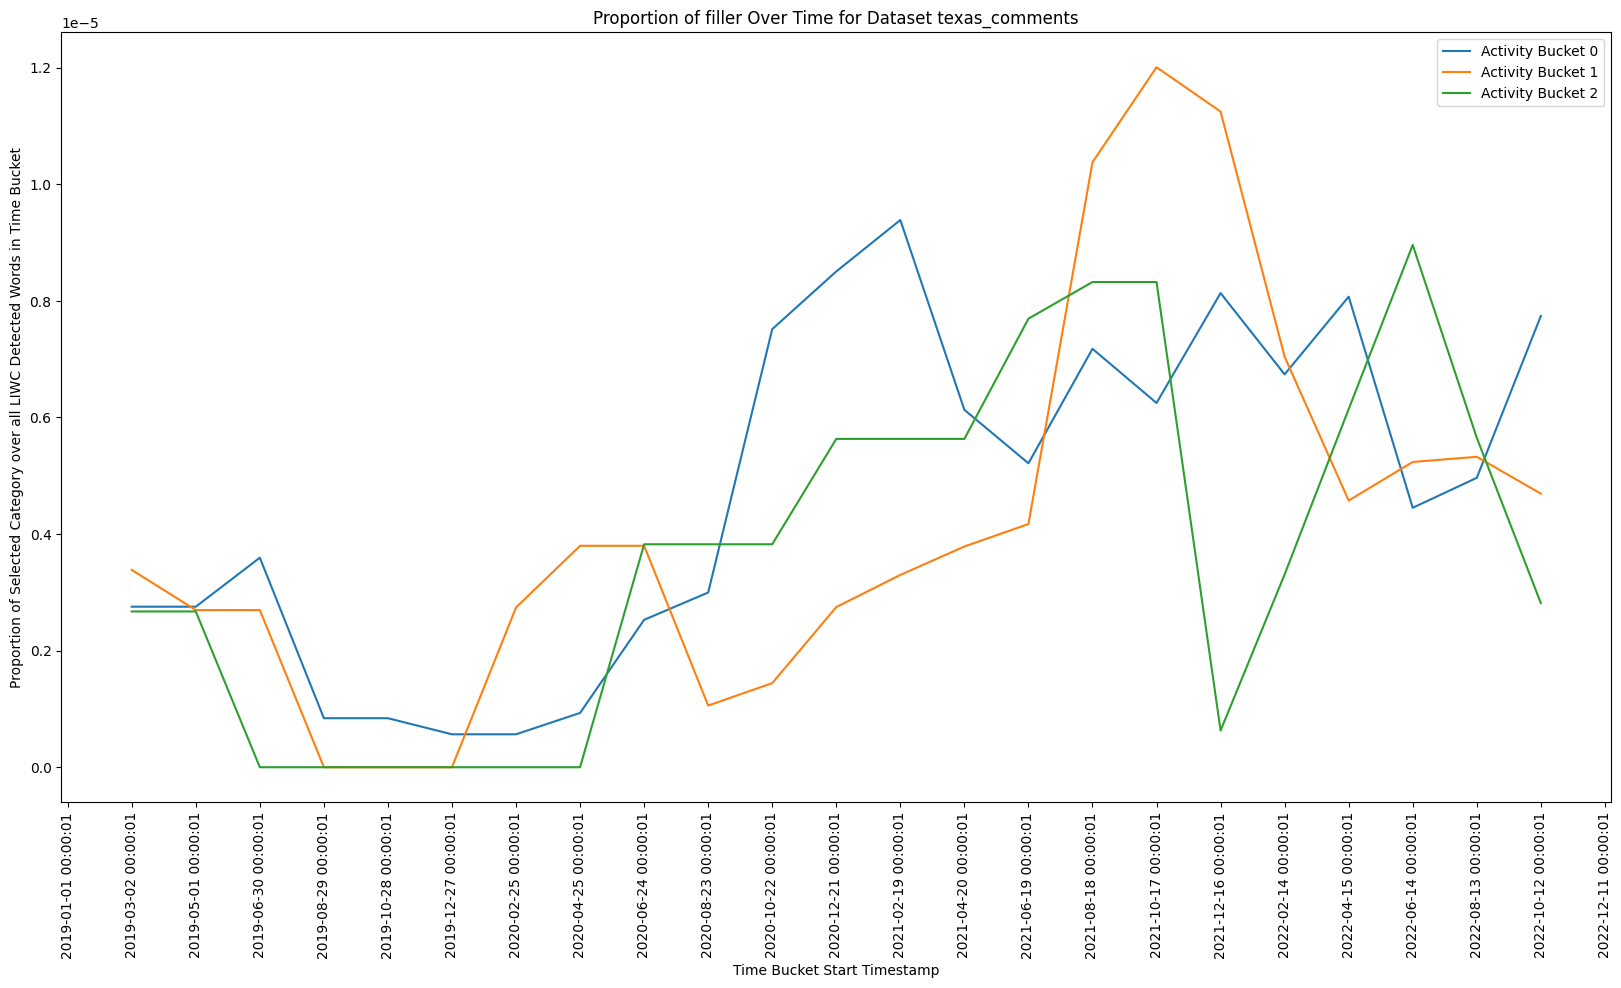

In [ ]:
# Read LIWC_category_dict_normalised as a literal string from a file
with open(f'text_liwc_dimensions/{os.path.basename(data_file_path[:-5])}_LIWC_normalised.json', 'r') as f:
    # Read the file as a string
    LIWC_category_dict_normalised = f.read()

    # Convert the string to a dictionary
    LIWC_category_dict_normalised = eval(LIWC_category_dict_normalised)

# Import datetime to convert the time_buckets to human readable labels
from datetime import datetime

# Extract the data from the dictionary
LIWC_by_bucket = LIWC_category_dict_normalised[category]

print(LIWC_by_bucket)

# Set plot size
plt.figure(figsize=(20, 10))

# Graph all activity buckets in different colours
for i in range(3):
    # Create a moving average by taking the average of the current, previous and next time bucket
    moving_average = [(LIWC_by_bucket[i][j] + LIWC_by_bucket[i][j - 1] + LIWC_by_bucket[i][j + 1]) / 3 for j in range(1, len(time_buckets) - 1)]
    # Plot the moving average
    plt.plot(time_buckets[1:-2], moving_average[:-1], label=f'Activity Bucket {i}')


# Give time buckets human readable labels
plt.xticks(time_buckets[:-1], [datetime.utcfromtimestamp(time_bucket).strftime('%Y-%m-%d %H:%M:%S') for time_bucket in time_buckets[:-1]], rotation=90)

# Add labels and title
plt.xlabel('Time Bucket Start Timestamp')
plt.ylabel('Proportion of Selected Category over all LIWC Detected Words in Time Bucket')
plt.title(f'Proportion of {category} Over Time for Dataset {os.path.basename(data_file_path[:-5])}')

# Add a legend
plt.legend()

# Display the graph
plt.show()

In [13]:
# Give a random sample of the types of body_text in the dataset that contain the selected category
import random

selected_category = 'posemo'

# Initialise a list of body_text that contain the selected category
body_text_list = []

# Start a progress bar
pbar = tqdm.tqdm(total=len(df))

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Get the LIWC_categories
    LIWC_categories = row['LIWC_categories']

    # Convert the LIWC_categories string to a dictionary
    LIWC_categories = eval(LIWC_categories)

    # # ------------------------------------------------------------------------#
    # # Check if the selected category is in the LIWC_categories
    # # Simple Magnitude
    # if LIWC_categories[selected_category] > 3:
    #     # Add the body_text to the list
    #     body_text_list.append(row['body_text'])

    # ------------------------------------------------------------------------#
    # A percentage of all LIWC words must be the selected category
    # Check that LIWC_categories[selected_category] is not zero to avoid division by zero
    if LIWC_categories[selected_category] != 0:
        if LIWC_categories[selected_category] / sum(LIWC_categories.values()) > 0.08:
            # Add the body_text to the list
            body_text_list.append(row['body_text'])

    # # ------------------------------------------------------------------------#
    # # The ratio between posemo and the sum of posemo and negemo must be greater than some percentage
    # # Check that LIWC_categories[selected_category] is not zero to avoid division by zero
    # if LIWC_categories['negemo'] != 0:
    #     if LIWC_categories['posemo'] / ((LIWC_categories['posemo'] + LIWC_categories['negemo'])) > 0.9:
    #         # Add the body_text to the list
    #         body_text_list.append(row['body_text'])
    
    # Update the progress bar
    pbar.update(1)

# Close the progress bar
pbar.close()

print(len(body_text_list))

# Print a random sample of the body_text
print(*random.sample(body_text_list, 10), sep='\n')

100%|██████████| 1968638/1968638 [19:33<00:00, 1677.61it/s]

169395
 "trust me the rest of the country is sick of texas 2."
 "And we have a winner"
 "Please stay and vote"
 "YES!!! Its refreshing to hear the TRUTH!!! Thank you!!!!!!"
 "Another tough guy behind the keyboard.  Nice edits by the way."
 "I thought America was a joke in general"
 "Chernobyl is safe."
 "Thank you for coming legally!"
 "I appreciate it  thank you"
 "Thanks"
